In [1]:
import numpy as np

docs =['go india',
       'india india',
       'hip hip hurray',
       'jeetega bhai jeetega india jeetega',
       'bharat mata ki jai'
       ,'kohli kohli',
       'sachin sachin',
       'dhoni dhoni',
       'modi ji ki jai',
       'inquilab zindabad']

In [5]:
#We would be doing tokenising, here we will be converting the caps to small and deals with the special characters like that
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer= Tokenizer(oov_token='sandman') # oov token deals with future issues if the volcabulary does not incluse a word in future, it will replace it with sandman

In [ ]:
#we will send in our list
tokenizer.fit_on_texts(docs)


In [7]:
#lists the index alloted by the tokenizer

tokenizer.word_index


{'sandman': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'hurray': 11,
 'bhai': 12,
 'bharat': 13,
 'mata': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [8]:
#we can list  the frequescy count

tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [9]:
#gives the sentence count as 
tokenizer.document_count

10

In [10]:
#Encodes the sentences to the integers
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

In [11]:
#Now we would apply padding
from keras.utils import pad_sequences

sequences=pad_sequences(sequences=sequences,padding='post') # here we do post padding

In [12]:
sequences

array([[10,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 11,  0,  0],
       [ 3, 12,  3,  2,  3],
       [13, 14,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [15, 16,  5,  6,  0],
       [17, 18,  0,  0,  0]], dtype=int32)

## Sample project using Keras

In [13]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense, SimpleRNN , Embedding, Flatten

In [ ]:
(X_train,y_train),(X_test,y_test)=imdb.load_data()
#Already tokenised data set and integer encoded

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 135s 8us/step


In [18]:
X_train.shape

(25000,)

In [19]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [28]:
#We have trimmed the data, the actual data is around 140, we have trimmed to 50 here
X_train=pad_sequences(X_train,padding='post',maxlen=100)
X_test=pad_sequences(X_test,padding='post',maxlen=100)

In [29]:
X_train.shape

(25000, 100)

In [30]:
len(X_train[0])

100

In [31]:
X_train[0]

array([2071,   56,   26,  141,    6,  194, 7486,   18,    4,  226,   22,
         21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,   51,
         36,   28,  224,   92,   25,  104,    4,  226,   65,   16,   38,
       1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,   32,
         15,   16, 5345,   19,  178,   32,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

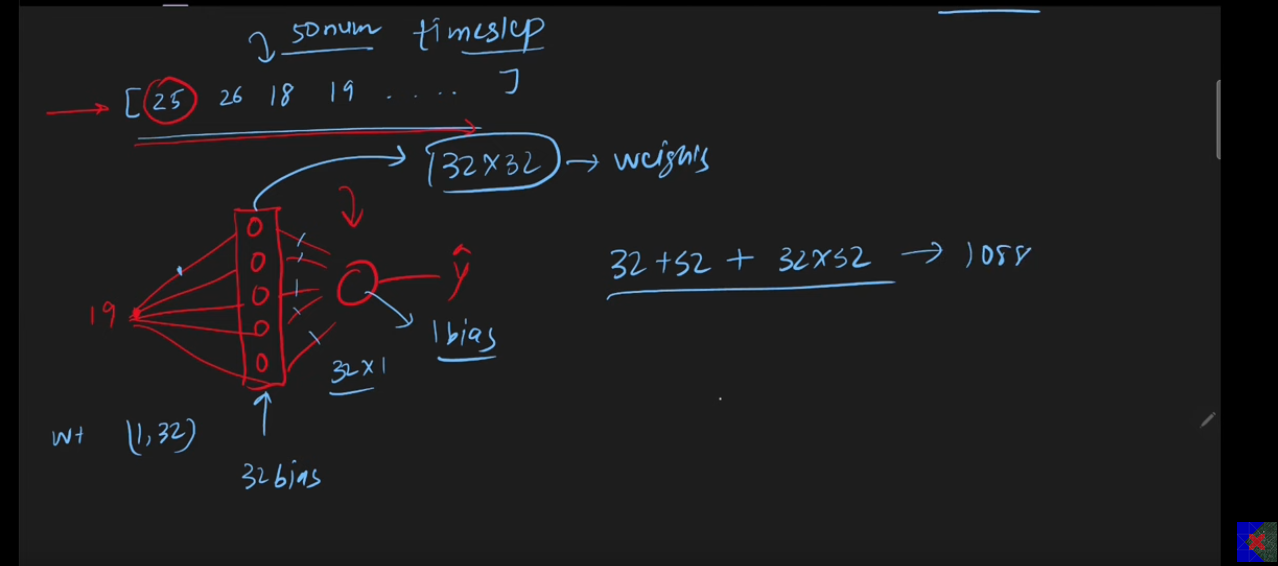

## The model configuration is above.

In [32]:
model = Sequential()
model.add(SimpleRNN(32,input_shape=(50,1),return_sequences=False)) #The return sequence is set false, as it will not go outside, will be kept inside only. This is done for sendiment analysis
model.add(Dense(1,activation='sigmoid'))
 
model.summary()

/home/section/sandman_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5021 - loss: 0.6948 - val_accuracy: 0.5018 - val_loss: 0.6932
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5057 - loss: 0.6932 - val_accuracy: 0.5016 - val_loss: 0.6931
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5035 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5067 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5081 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6933


## Create your own Embedding

In [38]:
import numpy as np
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense, SimpleRNN , Embedding, Flatten

docs =['go india',
       'india india',
       'hip hip hurray',
       'jeetega bhai jeetega india jeetega',
       'bharat mata ki jai'
       ,'kohli kohli',
       'sachin sachin',
       'dhoni dhoni',
       'modi ji ki jai',
       'inquilab zindabad']

In [39]:
#We would be doing tokenising, here we will be converting the caps to small and deals with the special characters like that
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer= Tokenizer(oov_token='sandman') # oov token deals with future issues if the volcabulary does not incluse a word in future, it will replace it with sandman

In [40]:
#we will send in our list
tokenizer.fit_on_texts(docs)


In [41]:
#Encodes the sentences to the integers
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

In [42]:
#Now we would apply padding
from keras.utils import pad_sequences

sequences=pad_sequences(sequences=sequences,padding='post') # here we do post padding

In [52]:
model= Sequential()
model.add(Embedding(input_dim=19,output_dim=2,input_length=5,input_shape=(5,))) #17 is the number of unique words in the vocabulary, 2 is the output dimension, it is a hyper parameter, is the dimension of the dense vector and 5 is the input dimension

model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (None, 5, 2)           │            38 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38 (152.00 B)

 Trainable params: 38 (152.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile('adam','accuracy')

In [54]:
pred= model.predict(sequences)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
[[[-0.00533473  0.0020478 ]
  [ 0.00731573  0.01844338]
  [-0.01943605 -0.04322641]
  [-0.01943605 -0.04322641]
  [-0.01943605 -0.04322641]]

 [[ 0.00731573  0.01844338]
  [ 0.00731573  0.01844338]
  [-0.01943605 -0.04322641]
  [-0.01943605 -0.04322641]
  [-0.01943605 -0.04322641]]

 [[ 0.0168118  -0.02454274]
  [ 0.0168118  -0.02454274]
  [ 0.04322903 -0.0305724 ]
  [-0.01943605 -0.04322641]
  [-0.01943605 -0.04322641]]

 [[-0.04146876 -0.02455876]
  [-0.00712311  0.04773228]
  [-0.04146876 -0.02455876]
  [ 0.00731573  0.01844338]
  [-0.04146876 -0.02455876]]

 [[ 0.00990502 -0.0196125 ]
  [-0.02042347  0.01777791]
  [-0.01465814 -0.04272432]
  [-0.03903506  0.02657286]
  [-0.01943605 -0.04322641]]

 [[ 0.00907205 -0.0255131 ]
  [ 0.00907205 -0.0255131 ]
  [-0.01943605 -0.04322641]
  [-0.01943605 -0.04322641]
  [-0.01943605 -0.04322641]]

 [[-0.01596976  0.0004998 ]
  [-0.01596976  0.0004998 ]
  [-0.01943605 -0.04322641]
  [-0.01943605 -0.0432264

## Embedding on IMDB data

In [57]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten


In [ ]:
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=10000) #num words given 10000, to set up the embedding for 10000

In [69]:
X_train=pad_sequences(X_train,padding='post',maxlen=50)
X_test=pad_sequences(X_test,padding='post',maxlen=50)

In [70]:
X_train.shape

(25000, 50)

## model Archetecture.
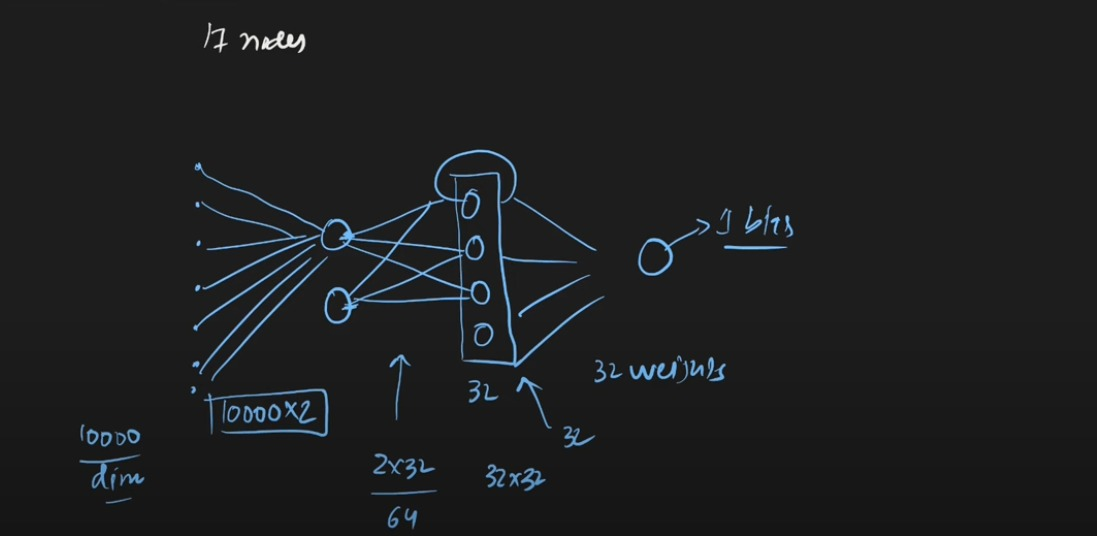

In [71]:
model=Sequential()
model.add(Embedding(10000,2,input_shape=(50,)))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/home/section/sandman_venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)        │ (None, 50, 2)          │        20,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,153 (82.63 KB)

 Trainable params: 21,153 (82.63 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5


782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - acc: 0.5456 - loss: 0.6782 - val_acc: 0.7904 - val_loss: 0.4546
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.8195 - loss: 0.4078 - val_acc: 0.8089 - val_loss: 0.4246
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.8723 - loss: 0.3153 - val_acc: 0.8092 - val_loss: 0.4252
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.8924 - loss: 0.2727 - val_acc: 0.8002 - val_loss: 0.4537
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.9153 - loss: 0.2246 - val_acc: 0.7958 - val_loss: 0.5024
